In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('CarPrice_Assignment.csv')

In [2]:
# Checking first 5 rows 
df.head(5)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
# Checking the shape
df.shape

(205, 26)

In [4]:
# Checking the datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# Checking null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
# Checking any duplicated values
df.duplicated().sum()

0

In [7]:
# For getting descriptive statistical information
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

<AxesSubplot:>

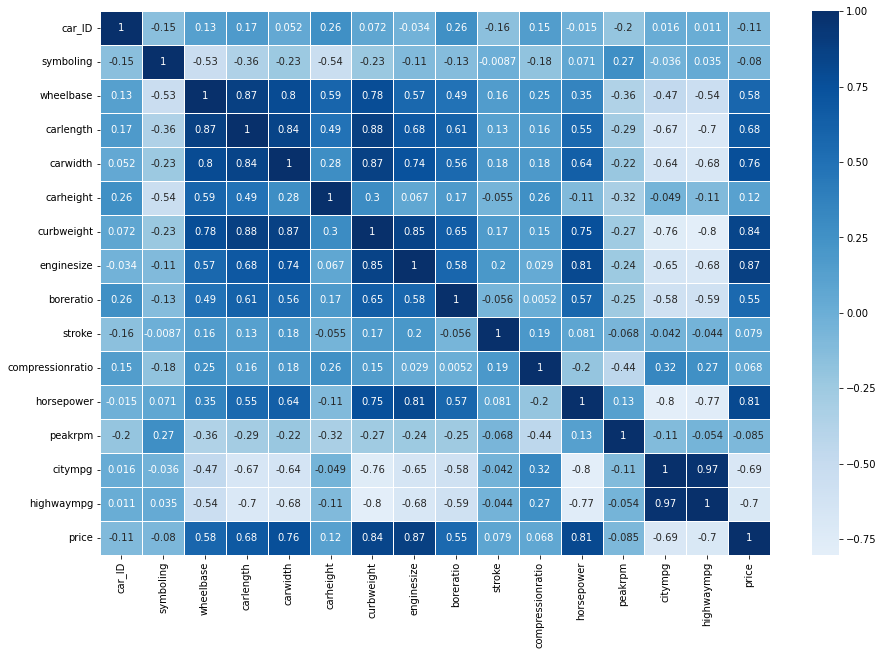

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True, cmap="Blues", linewidths=1,ax= ax,center =0)

# Data preprocessing


It's also worth considering the correlation of the feature with other features in your dataset. If the feature has a strong correlation with other features, it may still be useful for your model. For example, if the feature is strongly correlated with other features that are strongly correlated with the target label, then it may still be useful.

In [9]:
df = df.drop(['car_ID','symboling','peakrpm'],axis=1)
df.head(3)

CarName fueltype aspiration doornumber      carbody  \
0        alfa-romero giulia      gas        std        two  convertible   
1       alfa-romero stelvio      gas        std        two  convertible   
2  alfa-romero Quadrifoglio      gas        std        two    hatchback   

  drivewheel enginelocation  wheelbase  carlength  carwidth  ...  \
0        rwd          front       88.6      168.8      64.1  ...   
1        rwd          front       88.6      168.8      64.1  ...   
2        rwd          front       94.5      171.2      65.5  ...   

   cylindernumber  enginesize fuelsystem boreratio  stroke compressionratio  \
0            four         130       mpfi      3.47    2.68              9.0   
1            four         130       mpfi      3.47    2.68              9.0   
2             six         152       mpfi      2.68    3.47              9.0   

   horsepower  citympg  highwaympg    price  
0         111       21          27  13495.0  
1         111       21          27  16500.0  
2         154       19          26  16500.0  

[3 rows x 23 columns]

In [10]:
df.select_dtypes(include='object')

CarName fueltype aspiration doornumber      carbody  \
0          alfa-romero giulia      gas        std        two  convertible   
1         alfa-romero stelvio      gas        std        two  convertible   
2    alfa-romero Quadrifoglio      gas        std        two    hatchback   
3                 audi 100 ls      gas        std       four        sedan   
4                  audi 100ls      gas        std       four        sedan   
..                        ...      ...        ...        ...          ...   
200           volvo 145e (sw)      gas        std       four        sedan   
201               volvo 144ea      gas      turbo       four        sedan   
202               volvo 244dl      gas        std       four        sedan   
203                 volvo 246   diesel      turbo       four        sedan   
204               volvo 264gl      gas      turbo       four        sedan   

    drivewheel enginelocation enginetype cylindernumber fuelsystem  
0          rwd          front       dohc           four       mpfi  
1          rwd          front       dohc           four       mpfi  
2          rwd          front       ohcv            six       mpfi  
3          fwd          front        ohc           four       mpfi  
4          4wd          front        ohc           five       mpfi  
..         ...            ...        ...            ...        ...  
200        rwd          front        ohc           four       mpfi  
201        rwd          front        ohc           four       mpfi  
202        rwd          front       ohcv            six       mpfi  
203        rwd          front        ohc            six        idi  
204        rwd          front        ohc           four       mpfi  

[205 rows x 10 columns]

In [11]:
F_type = []
for i in df['fueltype']:
    if i =='gas':
        F_type.append(0)
    else:
        F_type.append(1)
F_type = pd.DataFrame(F_type,columns=['Fuel_type'])
df = pd.concat([df,F_type],axis=1)
df = df.drop(['fueltype'],axis=1)

In [12]:
asp_type = []
for i in df['aspiration']:
    if i =='std':
        asp_type.append(0)
    else:
        asp_type.append(1)
asp_type = pd.DataFrame(asp_type,columns=['Aspiration'])
df = pd.concat([df,asp_type],axis=1)
df = df.drop(['aspiration'],axis=1)

In [13]:
eloc = []
for i in df['enginelocation']:
    if i =='front':
        eloc.append(0)
    else:
        eloc.append(1)
eloc = pd.DataFrame(eloc,columns=['Engline_loc'])
df = pd.concat([df,eloc],axis=1)
df = df.drop(['enginelocation'],axis=1)

In [14]:
d_num = []
for i in df['doornumber']:
    if i =='four':
        d_num.append(0)
    elif i =='two':
        d_num.append(1)
d_num = pd.DataFrame(d_num,columns=['Doors'])
df = pd.concat([df,d_num],axis=1)
df = df.drop(['doornumber'],axis=1)

In [15]:
cb = []
for i in df['carbody']:
    if i == 'hatchback':
        cb.append(0)
    elif i == 'sedan':
        cb.append(1)
    elif i == 'wagon':
        cb.append(2)
    elif i == 'hardtop':
        cb.append(3)
    elif i == 'convertible':
        cb.append(4)
    else:
        cb.append(5)

cb = pd.DataFrame(cb,columns=['Car_body'])
df = pd.concat([df,cb],axis=1)
df = df.drop(['carbody'],axis=1)

In [16]:
cn = []
for i in df['cylindernumber']:
    if i == 'two':
        cn.append(0)
    elif i == 'three':
        cn.append(1)
    elif i == 'four':
        cn.append(2)
    elif i == 'five':
        cn.append(3)
    elif i == 'six':
        cn.append(4)
    elif i == 'eight':
        cn.append(5)
    elif i == 'twelve':
        cn.append(6)

cn = pd.DataFrame(cn,columns=['Cylinders'])
df = pd.concat([df,cn],axis=1)
df = df.drop(['cylindernumber'],axis=1)

In [17]:
en_type = []
for i in df['enginetype']:
    if i == 'ohc':
        en_type.append(0)
    elif i == 'dohc':
        en_type.append(1)
    elif i == 'ohcv':
        en_type.append(2)
    elif i == 'dohcv':
        en_type.append(3)
    elif i == 'ohcf':
        en_type.append(4)
    elif i == 'l':
        en_type.append(5)
    elif i == 'rotor':
        en_type.append(6)
        
en_type = pd.DataFrame(en_type,columns=['Engine_type'])
df = pd.concat([df,en_type],axis=1)
df = df.drop(['enginetype'],axis=1)

In [18]:
f_sys = []
for i in df['fuelsystem']:
    if i == 'mpfi':
        f_sys.append(0)
    elif i == 'mfi':
        f_sys.append(1)
    elif i == 'spfi':
        f_sys.append(2)
    elif i == 'idi':
        f_sys.append(3)
    elif i == '2bbl':
        f_sys.append(4)
    elif i == '1bbl':
        f_sys.append(5)
    elif i == '4bbl':
        f_sys.append(6)
    elif i == 'spdi':
        f_sys.append(7)

f_sys = pd.DataFrame(f_sys,columns=['Fuel_system'])
df = pd.concat([df,f_sys],axis=1)
df = df.drop(['fuelsystem'],axis=1)

In [19]:
d_wheel = []
for i in df['drivewheel']:
    if i =='fwd':
        d_wheel.append(0)
    elif i =='4wd':
        d_wheel.append(1)
    elif i =='rwd':
        d_wheel.append(2)
d_wheel = pd.DataFrame(d_wheel,columns=['Drive_wheel'])
df = pd.concat([df,d_wheel],axis=1)
df = df.drop(['drivewheel'],axis=1)

In [20]:
df['Brand'] = [car.split(' ')[0] for car in df['CarName']]
df = df.drop(['CarName'],axis=1)

<AxesSubplot:>

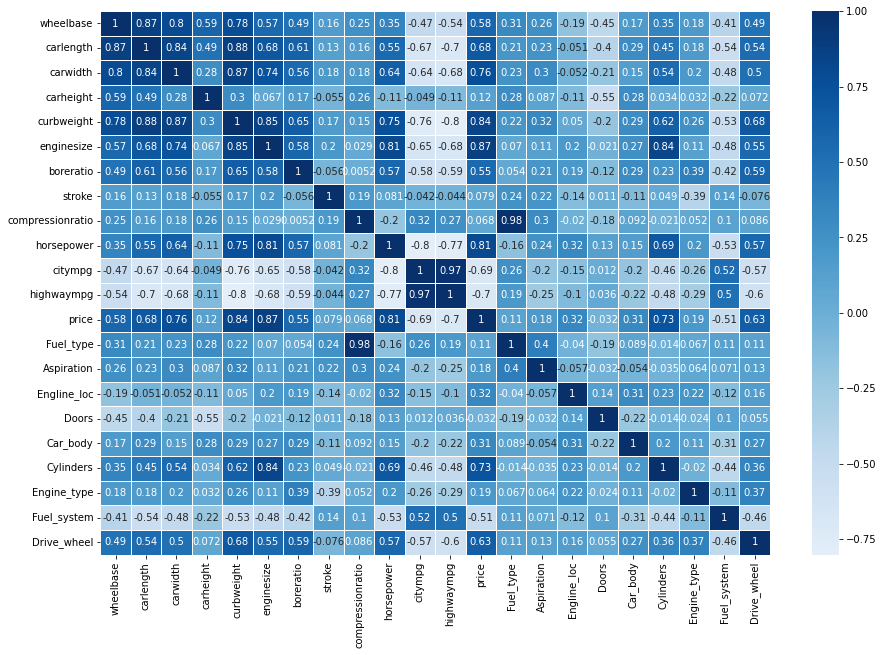

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True, cmap="Blues", linewidths=1,ax= ax,center =0)

In [22]:
# under survillience : compression,fuetype,engine_location
df = df.drop(['stroke'],axis=1)
df = pd.get_dummies(df,columns=['Brand'])

In [28]:
col = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'compressionratio', 'horsepower', 'citympg',
       'highwaympg', 'Fuel_type', 'Aspiration', 'Engline_loc', 'Doors',
       'Car_body', 'Cylinders', 'Engine_type', 'Fuel_system', 'Drive_wheel',
       'Brand_Nissan', 'Brand_alfa-romero', 'Brand_audi', 'Brand_bmw',
       'Brand_buick', 'Brand_chevrolet', 'Brand_dodge', 'Brand_honda',
       'Brand_isuzu', 'Brand_jaguar', 'Brand_maxda', 'Brand_mazda',
       'Brand_mercury', 'Brand_mitsubishi', 'Brand_nissan', 'Brand_peugeot',
       'Brand_plymouth', 'Brand_porcshce', 'Brand_porsche', 'Brand_renault',
       'Brand_saab', 'Brand_subaru', 'Brand_toyota', 'Brand_toyouta',
       'Brand_vokswagen', 'Brand_volkswagen', 'Brand_volvo', 'Brand_vw']

In [25]:
y = df['price']
X = df.drop(['price'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating dataframes
X_train = pd.DataFrame(X_train,columns = col)
X_test = pd.DataFrame(X_test,columns = col)

# Training the model

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 1629.9043673991785
MSE 6353036.5431545
R2 score 0.9029110588824578
